# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data_complete = pd.merge(study_results,mouse_metadata, on="Mouse ID",)


# Display the data table for preview
merge_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
merge_data_complete["Mouse ID"].count()
merge_data_complete["Mouse ID"].nunique()

249

In [4]:
# Checking the number of mice.



In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Duplicated_mouse= merge_data_complete.loc[merge_data_complete.duplicated(subset=['Mouse ID','Timepoint']),"Mouse ID"].unique()
Duplicated_mouse 

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
new_df = merge_data_complete[merge_data_complete["Mouse ID"] =='g989']
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_data_complete.drop_duplicates(["Mouse ID","Timepoint"])
clean_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

In [9]:
clean_df= merge_data_complete[merge_data_complete["Mouse ID"].isin(Duplicated_mouse) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.


summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: x.std() / (len(x) ** 0.5)  
).reset_index()

# Set 'Drug Regimen' as the index
summary_stats.set_index('Drug Regimen', inplace=True)

# Display the summary statistics
summary_stats

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

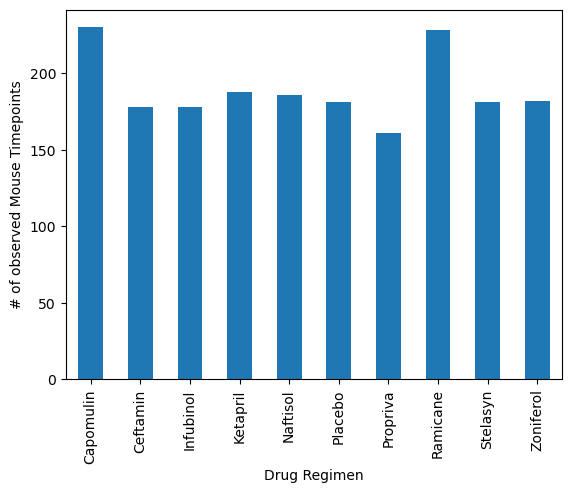

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = merge_data_complete.groupby('Drug Regimen').size()
regimen_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.show()


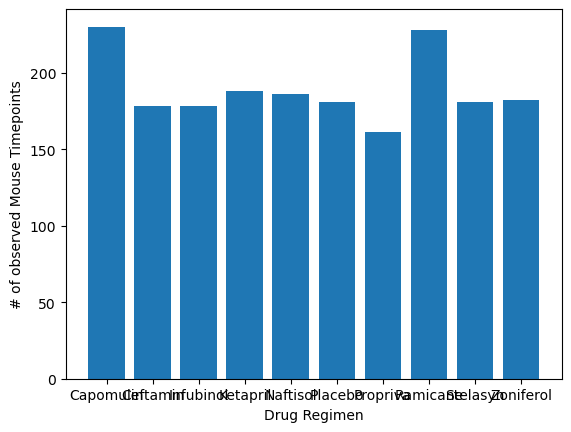

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = merge_data_complete.groupby('Drug Regimen').size()
x_labels = regimen_counts.index  
y_values = regimen_counts.values  

plt.bar(x_labels, y_values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')


plt.show()

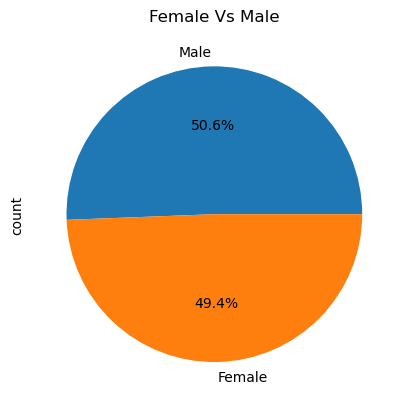

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts =  merge_data_complete['Sex'].value_counts()
gender_counts.plot.pie(autopct="%1.1f%%")
plt.title ('Female Vs Male')

# Make the pie chart
plt.show()

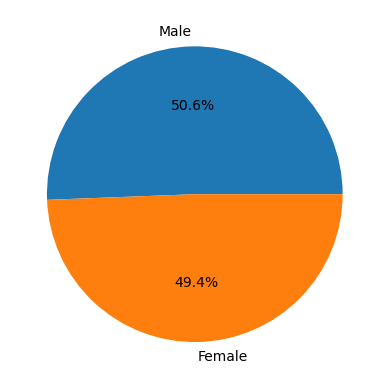

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
gender_counts = merge_data_complete['Sex'].value_counts()

labels = gender_counts.index  
sizes = gender_counts.values  
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_df = clean_df.loc[merge_data_complete["Drug Regimen"] == "Capomulin"]
Ramicane_df = clean_df.loc[merge_data_complete["Drug Regimen"] == "Ramicane"]
Infubinol_df = clean_df.loc[merge_data_complete["Drug Regimen"] == "Infubinol"]
Ceftamin_df = clean_df.loc[merge_data_complete["Drug Regimen"] == "Ceftamin"]


In [16]:
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


potential_outliers=[]

for treatment in treatments:
    drug_data= regimen_type.loc[regimen_type['Drug Regimen']==treatment,'Tumor Volume (mm3)']
    
    
    quartiles=drug_data.quantile([.25, .5, .75])
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75]
    iqr=upper_q-lower_q

    lower_bound=lower_q-(1.5*iqr)
    upper_bound=upper_q+(1.5*iqr)

    potnetial_outliers_treatment=drug_data.loc[(drug_data<lower_bound) | (drug_data>upper_bound)]
    potential_outliers.append(potnetial_outliers_treatment)

for i, treatment in enumerate (treatments):
    print(f"{treatment}'s potential outliers:")
    if i < len(potential_outliers):
        print(potential_outliers[i])
    else:
        print("No potential outliers found for this treatment.")

NameError: name 'regimen_type' is not defined

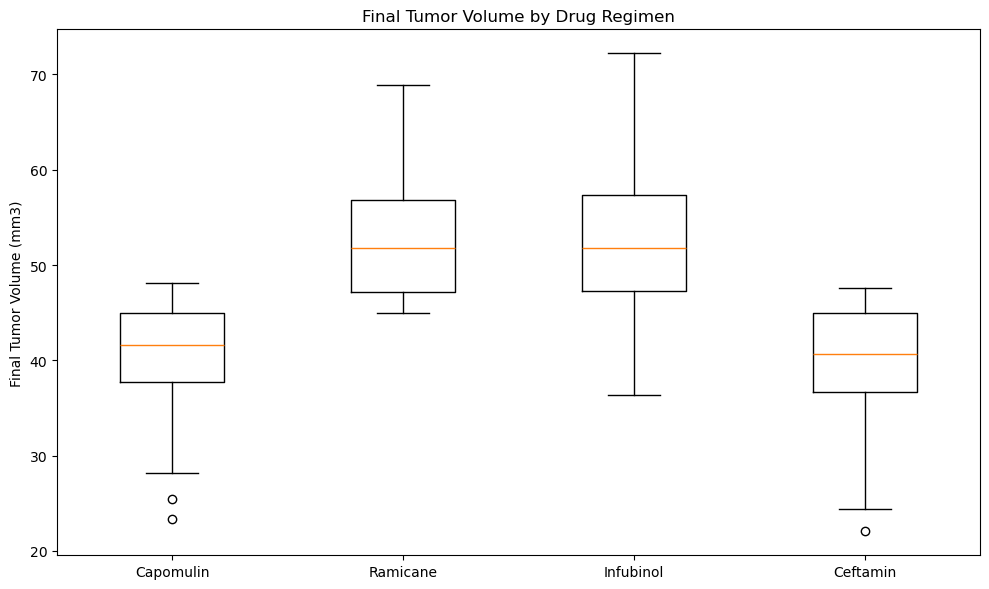

In [19]:
# List of drug regimens to include
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the dataframe for the specified drug regimens and group the data
volume_data =merge_data_complete  [merge_data_complete ['Drug Regimen'].isin(drug_regimens)].groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(volume_data.values)

# Set the x-axis labels
plt.xticks(range(1, len(drug_regimens) + 1), drug_regimens)

# Set the y-axis label
plt.ylabel('Final Tumor Volume (mm3)')

# Add a title
plt.title('Final Tumor Volume by Drug Regimen')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

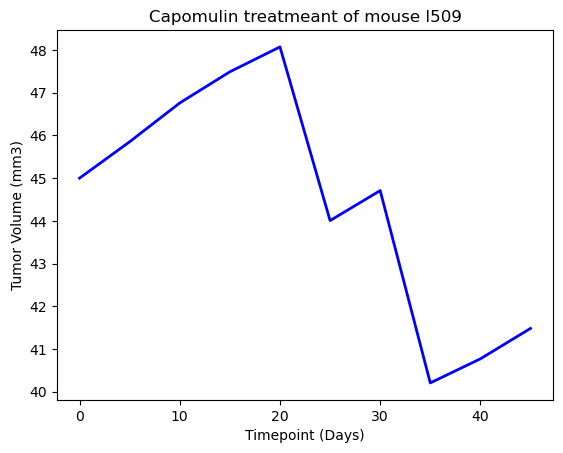

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [21]:
merge_data_complete 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


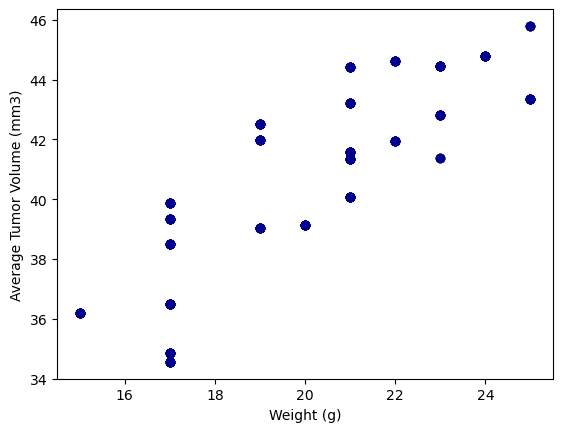

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame named 'df' containing your data
regimen_type =merge_data_complete [merge_data_complete ['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = regimen_type.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the dataframes to include the average tumor volume
capomulin_avg_stats = pd.merge(regimen_type, avg_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

# Create the scatter plot
plt.scatter(capomulin_avg_stats['Weight (g)'], capomulin_avg_stats['Tumor Volume (mm3)_average'], marker='o', facecolors='darkblue')

# Set the labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


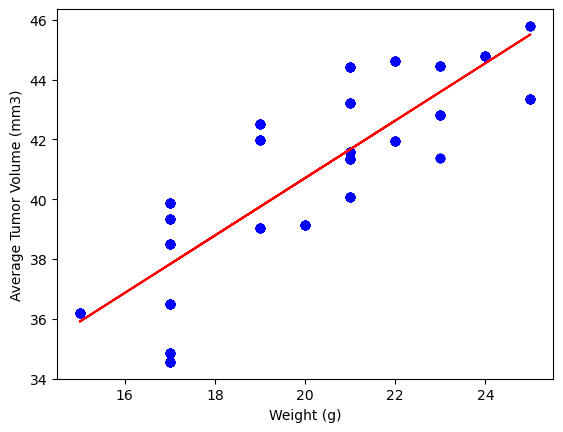

In [23]:
# Calculate the correlation coefficient and a linear regression model
import scipy.stats as st

# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = pd.DataFrame(capomulin_avg_stats)

correlation_coefficient, _ = st.pearsonr(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)_average'])
correlation_coefficient = round(correlation_coefficient, 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

slope, intercept, _, _, _ = st.linregress(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)_average'])

plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)_average'], color='blue')
plt.plot(capomulin_df['Weight (g)'], slope * capomulin_df['Weight (g)'] + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()